In [23]:
import pandas as pd
import re
df = pd.read_excel('For Analyst.xlsx', sheet_name = 'dh_product_lookup')

In [24]:
df.head()

,upc,product_description,commodity,brand,product_size,product_size.1,pro_descandsize
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,25 OZ,VINCENT S ORIG MARINARA S 25 OZ
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40 OZ,40 OZ,PINE MOUNTAIN SYRUP 40 OZ
2,566300028,MILLER CANE SYRUP,syrups,Miller,19 OZ,19 OZ,MILLER CANE SYRUP 19 OZ
3,566300029,MILLER CANE SYRUP,syrups,Miller,12 OZ,12 OZ,MILLER CANE SYRUP 12 OZ
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19 OZ,19 OZ,PINE MOUNTAIN SYRUP 19 OZ


In [25]:
df['product_size'] = df['product_size'].astype(str)

In [26]:
def clean_product_size(size):
    if pd.isnull(size):
        return size
    size = re.sub(r'(\d+)\s+(\d+)/(\d+)', lambda x: str(int(x.group(1)) + float(x.group(2)) / float(x.group(3))), size) #แปลงสตริงเศษส่วนเป็นทศนิยม
    size = re.sub(r'\b\.\d+\b', lambda x: '0'+x.group(0), size) #แปลงสตริงที่มีจุดทศนิยมแต่ไม่มีหลักหน่วย
    size = ' '.join(size.split()) #ลบช่องว่างหลายช่องให้เหลือแค่ช่องเดียว
    size = size.replace('OUNCE', 'OZ')
    return size

In [27]:
df['product_size'] = df['product_size'].apply(clean_product_size)
df['pro_descandsize'] = df['pro_descandsize'].apply(clean_product_size)

In [28]:
df

,upc,product_description,commodity,brand,product_size,product_size.1,pro_descandsize
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ,25 OZ,VINCENT S ORIG MARINARA S 25 OZ
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40 OZ,40 OZ,PINE MOUNTAIN SYRUP 40 OZ
2,566300028,MILLER CANE SYRUP,syrups,Miller,19 OZ,19 OZ,MILLER CANE SYRUP 19 OZ
3,566300029,MILLER CANE SYRUP,syrups,Miller,12 OZ,12 OZ,MILLER CANE SYRUP 12 OZ
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19 OZ,19 OZ,PINE MOUNTAIN SYRUP 19 OZ
...,...,...,...,...,...,...,...
922,9999985217,PRIVATE LABEL ALPHABETS,pasta,Private Label,16 OZ,16 OZ,PRIVATE LABEL ALPHABETS 16 OZ
923,9999985260,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,Private Label,32 OZ,32 OZ,PRIVATE LABEL COMPLETE PANCAKE MIX 32 OZ
924,9999985261,PRIVATE LABEL COMPLETE PANCAKE MIX,pancake mixes,Private Label,2 LB,2 LB,PRIVATE LABEL COMPLETE PANCAKE MIX 2 LB
925,9999985488,PRIVATE LABEL ITAL NESTED ANGEL HAIR,pasta,Private Label Premium,16 OZ,16 OZ,PRIVATE LABEL ITAL NESTED ANGEL HAIR 16 OZ


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   upc                  927 non-null    int64 
 1   product_description  927 non-null    object
 2   commodity            927 non-null    object
 3   brand                927 non-null    object
 4   product_size         927 non-null    object
 5   product_size.1       927 non-null    object
 6   pro_descandsize      927 non-null    object
dtypes: int64(1), object(6)
memory usage: 50.8+ KB


In [30]:
df.to_excel('For Analyst Clean.xlsx', index = False)

In [6]:
import pandas as pd
df = pd.read_excel('For Analyst.xlsx', sheet_name = 'dh_datemonth')

In [7]:
df

,Date,Month
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
...,...,...
190,191,NaN
191,192,NaN
192,193,NaN
193,194,NaN


In [8]:
days_in_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

In [12]:
def cal_month(day):
    total_days = 0
    for month, days in enumerate(days_in_month, start=1):
        total_days += days
        if day <= total_days:
            return month
    return None

In [13]:
df['Month'] = df['Date'].apply(cal_month)

In [14]:
df

,Date,Month
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
190,191,7
191,192,7
192,193,7
193,194,7


In [15]:
df.to_excel('date_month.xlsx', index = False)

In [70]:
import pandas as pd
df = pd.read_csv('dh_transactions.csv')

In [20]:
df

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,Time,Price
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,11:00,0.80
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0,11:00,3.59
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0,11:37,2.25
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0,11:48,0.85
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0,13:23,2.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1510000011,2.35,2,1307,2,27,43825,346,665448,189,0,13:07,4.70
1048571,3620000489,0.99,2,1307,2,27,43825,346,665448,189,0,13:07,1.98
1048572,9999971309,2.00,2,1410,2,27,42140,346,665449,189,0,14:10,4.00
1048573,3620000250,1.98,2,1415,2,27,53544,346,665450,189,0,14:15,3.96


In [29]:
unique_bill_by_customer = df.groupby('household')['basket'].nunique().reset_index(name = 'bills')
print(unique_bill_by_customer)

        household  bills
0               1      1
1               2     14
2               5      2
3               6      1
4               7      1
...           ...    ...
249605     510020      1
249606     510021      5
249607     510022      2
249608     510023      1
249609     510027      1

[249610 rows x 2 columns]


In [30]:
top20_households = unique_bill_by_customer.sort_values(by = 'bills', ascending = False).head(40)

In [31]:
print("TOP 20:")
print(top20_households)

TOP 20:
        household  bills
35746       56869     47
196743     323105     42
50156       79606     42
83576      133748     41
66951      106758     41
17722       28955     41
178857     293395     40
44264       70459     37
241988     425783     36
244940     451623     35
151124     244980     34
144325     232513     34
45091       71731     34
79231      126543     33
121820     194354     32
173015     283523     31
207936     340439     31
170483     278738     31
52649       83630     30
51166       81224     29
108583     173638     29
246702     470589     29
177921     291871     29
112058     178863     29
87777      140873     28
126116     201449     28
243316     439406     28
142378     229178     28
86674      139025     27
35860       57063     27
238421     402517     27
208067     340632     27
7642        12940     27
212718     348215     27
30764       48590     27
102102     163278     27
119427     190449     26
135980     218288     26
163117     265319

In [27]:
top20_households = unique_bill_by_customer.sort_values(by = 'bills').head(100)

In [28]:
print("bottom 20:")
print(top20_households)

bottom 20:
        household  bills
0               1      1
139213     223745      1
139214     223746      1
139215     223748      1
139216     223750      1
...           ...    ...
139042     223455      1
139038     223446      1
139013     223406      1
139014     223407      1
139015     223411      1

[100 rows x 2 columns]


In [37]:
unique_values = unique_bill_by_customer['bills'].unique()

In [44]:
import numpy as np
sorted_unique_values = np.sort(uni)
print(sorted_unique_values)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 40 41 42 47]


In [45]:
Q1 = np.percentile(sorted_unique_values, 25)
Q2 = np.percentile(sorted_unique_values, 50)
Q3 = np.percentile(sorted_unique_values, 75)



Q1 (25th percentile): 11.0
Median (50th percentile)/Q2: 21.0
Q3 (75th percentile): 31.0


In [59]:
def classify_customer(bills):
    if bills <= Q1:
        return 'ลูกค้าขาจร'
    else:
        return 'ลูกค้าประจำ'

In [60]:
unique_bill_by_customer['Customer Group'] = unique_bill_by_customer['bills'].apply(classify_customer)

In [61]:
print(unique_bill_by_customer)

        household  bills Customer Group
0               1      1     ลูกค้าขาจร
1               2     14    ลูกค้าประจำ
2               5      2     ลูกค้าขาจร
3               6      1     ลูกค้าขาจร
4               7      1     ลูกค้าขาจร
...           ...    ...            ...
249605     510020      1     ลูกค้าขาจร
249606     510021      5     ลูกค้าขาจร
249607     510022      2     ลูกค้าขาจร
249608     510023      1     ลูกค้าขาจร
249609     510027      1     ลูกค้าขาจร

[249610 rows x 3 columns]


In [62]:
unique_bill_by_customer.to_excel('dh_household_type2.xlsx', index = False)

In [66]:
df['dollar_sales'] = df['dollar_sales'].abs()
df['Price'] = df['Price'].abs()

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
heatmap_data = df.groupby('Hours')['basket'].nunique().reset_index(name = 'Count')


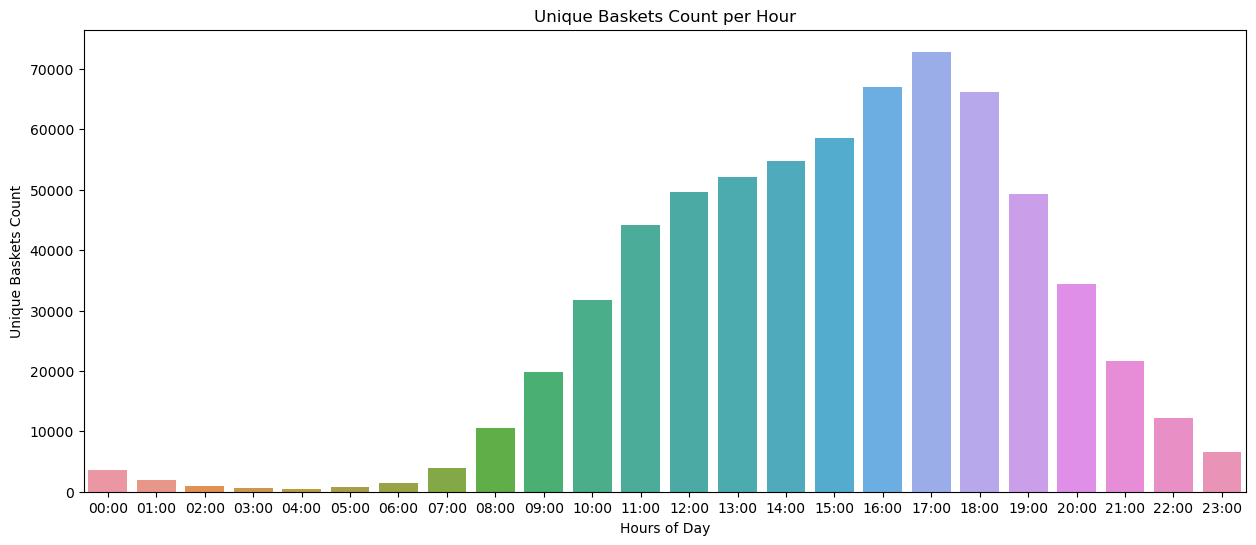

In [78]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Hours', y='Count', data=heatmap_data)
plt.title('Unique Baskets Count per Hour')
plt.xlabel('Hours of Day')
plt.ylabel('Unique Baskets Count')
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
transactions = pd.read_excel('dh_transaction.xlsx')
product = pd.read_csv('dh_product_lookup.csv')


In [7]:
merged_data = pd.merge(transactions, product, on='upc', how='left')

In [13]:
product_sales_summary = merged_data.groupby('product_size')['units'].sum().reset_index()
sort_product_sales_summary = product_sales_summary.sort_values(by = 'units', ascending = False).head(40)

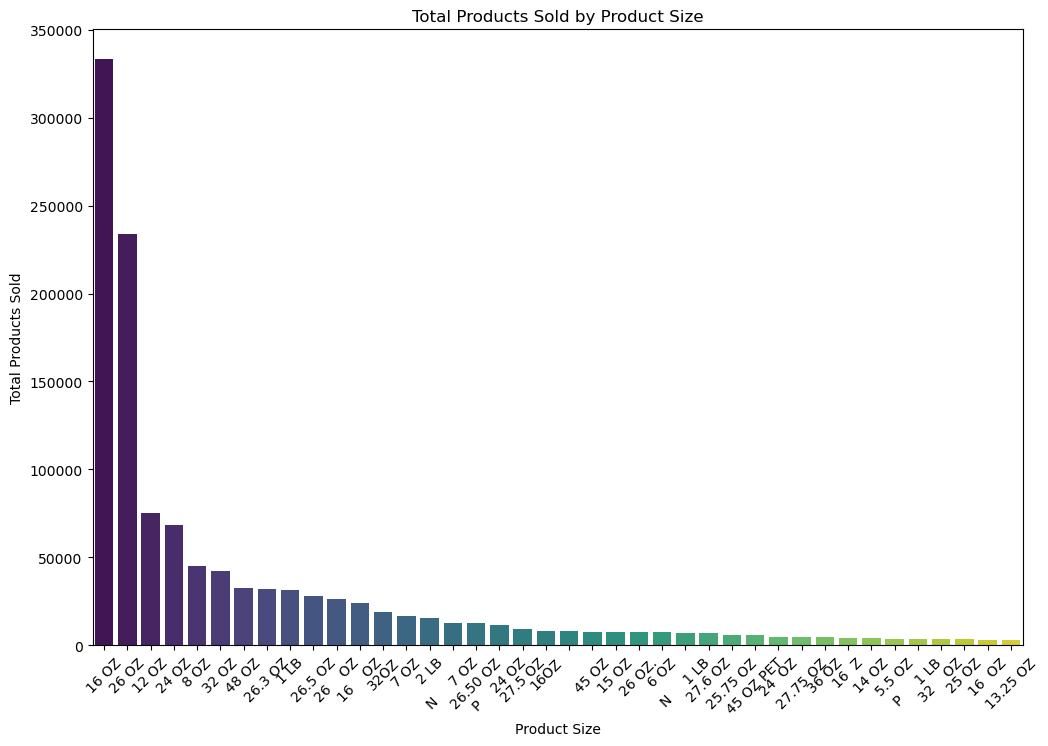

In [15]:
plt.figure(figsize=(12, 8))
sns.barplot(x='product_size', y='units', data=sort_product_sales_summary, palette='viridis')
plt.title('Total Products Sold by Product Size')
plt.xlabel('Product Size')
plt.ylabel('Total Products Sold')
plt.xticks(rotation=45)
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
transactions = pd.read_excel('dh_transaction.xlsx')
product = pd.read_csv('dh_product_lookup.csv')


In [33]:
merged_data = pd.merge(transactions, product, on='upc', how='left')

In [34]:
commodity_data = merged_data.groupby('commodity')['Price'].sum().reset_index()
commodity_data

,commodity,Price
0,pancake mixes,117868.53
1,pasta,818017.99
2,pasta sauce,1159129.60
3,syrups,386699.07


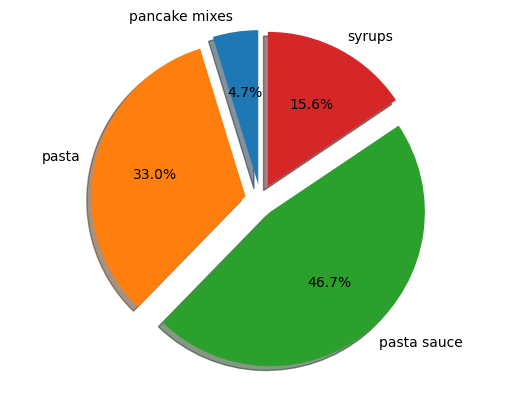

In [44]:
fig, ax = plt.subplots()
ax.axis('equal')

sizes = commodity_data['Price']
labels = commodity_data['commodity']
explode = [0.1] * len(labels)

ax.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)

ax.axis('equal')
plt.show()